# In this project I will implement a supervised learning algorithm to explain the data set & predict the quality of water.

## I begin by importing the libraries I will be using in this project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

## Now its time to import the Water Quality dataset

In [2]:
data = pd.read_csv("C:/Users/gavin/Jupyter/Datasets/waterQuality1.csv")
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


## Let's find out the size of our dataset.

In [3]:
data.shape

(7999, 21)

In [4]:
data = data.replace({'#NUM!':np.nan})
data.head(10)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
6,2.36,5.6,0.01,1.35,0.004,1.28,0.62,1.88,0.33,0.13,...,0.021,18.60,1.78,0.007,45.34,2.84,0.10,0.24,0.08,0
7,3.93,19.87,0.04,0.66,0.001,6.22,0.10,1.86,0.86,0.16,...,0.197,13.65,1.81,0.001,53.35,7.24,0.08,0.08,0.07,0
8,0.60,24.58,0.01,0.71,0.005,3.14,0.77,1.45,0.98,0.35,...,0.167,14.66,1.84,0.004,23.43,4.99,0.08,0.25,0.08,1
9,0.22,16.76,0.02,1.37,0.007,6.40,0.49,0.82,1.24,0.83,...,0.109,4.79,1.46,0.010,30.42,0.08,0.03,0.31,0.01,1


## Let's see if there are any missing values in the data set.

In [5]:
data.isna().sum()

aluminium      0
ammonia        3
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        3
dtype: int64

## There are a few missing values in the dataset, lets drop that data from the table.

In [6]:
data=data.dropna()

In [7]:
data.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

## Counts of each quality rating in the dataset. 

In [8]:
data['is_safe'].value_counts()

is_safe
0    7084
1     912
Name: count, dtype: int64

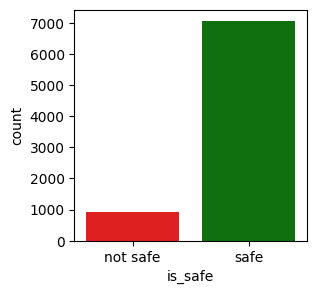

In [9]:
plt.figure(figsize=(3, 3))
sns.countplot(data=data, x='is_safe', hue='is_safe', palette=["red", "green"], legend=False)
plt.xticks([0, 1], ['not safe', 'safe'])
plt.show()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   object 
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

## Let's split the data, preparing it for testing & training by assigning them to seperate variables.

In [11]:
X = data.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].values 
Y = data.iloc[:, 20].values 

## It's time to implement the supervised algorithm. I have chosen the Decision Tree Classifier for this dataset.

## Here I  Split the data again into 80% training, 20% testing.

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier()
params =[{'criterion':['gini', 'entropy'],
          'max_depth':range(2,5),
          'min_samples_leaf':range(2,7),
         }]
grd = GridSearchCV(estimator=tree,param_grid=params,cv=3)

grd_model = grd.fit(X_train,Y_train)

y_predict = grd_model.predict(X_test)

## Now that our algorithm is trained, we can implement our prediction.

In [13]:
print('[5]Decision Tree Classifier Training Accuracy:', grd_model.score(X_train, Y_train)*100)

[5]Decision Tree Classifier Training Accuracy: 94.98123827392119


## 94% training accuracy is great! Let's validate this on the testing set.

In [14]:
print('[5]Decision Tree Classifier Testing Accuracy:', grd_model.score(X_test, Y_test)*100)

[5]Decision Tree Classifier Testing Accuracy: 94.75


# Feature Importances

## Let's find out which features are driving our predictions for water quality.

In [15]:
# Get the feature importances from the trained model
importances = grd_model.best_estimator_.feature_importances_

# Create a list of feature names
feature_names = data.columns[:-1]  # exclude the target variable 'is_safe'

# Create a dataframe to store the feature importances
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Print the top 10 most important features
print(importances_df.head(10))

        Feature  Importance
4       cadmium    0.340858
0     aluminium    0.284327
15  perchlorate    0.209406
19      uranium    0.060946
1       ammonia    0.056760
18       silver    0.029585
13     nitrites    0.010573
10      viruses    0.005416
5    chloramine    0.002130
3        barium    0.000000


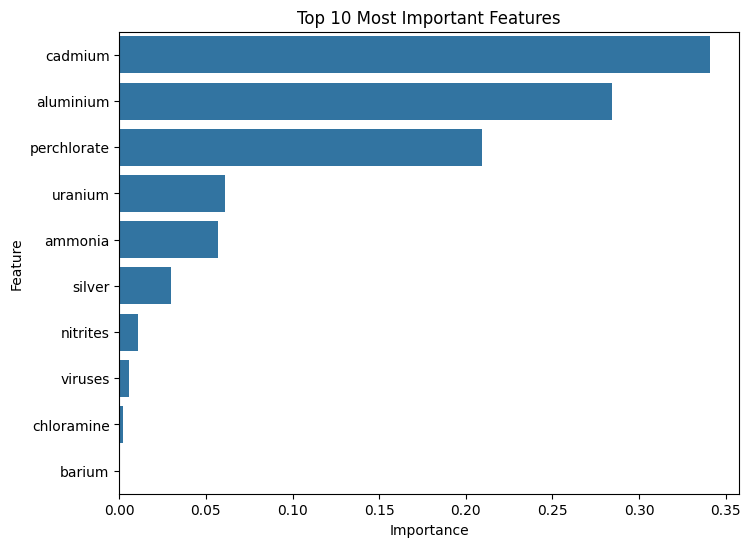

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df.head(10))
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## 'cadmium', 'aluminium', 'perchlorate', 'perchlorate', 'uranium','ammonia', 'silver' are some of the important features which affect the water quality.

# Kaggle Dataset
# https://www.kaggle.com/datasets/muhammedonurbudak/waterquality